Faire une API fonctionnelle

In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [3]:
layer_norm = keras.layers.Normalization(input_shape=X_train.shape[1:])
layer_hidden1 = keras.layers.Dense(50,activation="relu")
layer_hidden2 = keras.layers.Dense(50,activation="relu")
layer_concat = keras.layers.Concatenate()
layer_output = keras.layers.Dense(1)

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
norm = layer_norm(input_)
hidden1 = layer_hidden1(norm)
hidden2 = layer_hidden2(hidden1)
concat = layer_concat([norm,hidden2])
output = layer_output(concat)

model = keras.Model(inputs = [input_],outputs=[output])

In [5]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm.adapt(X_train)
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 0.9426 - root_mean_squared_error: 0.9709 - val_loss: 0.5158 - val_root_mean_squared_error: 0.7182
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4296 - root_mean_squared_error: 0.6554 - val_loss: 0.4293 - val_root_mean_squared_error: 0.6552
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3861 - root_mean_squared_error: 0.6214 - val_loss: 0.4326 - val_root_mean_squared_error: 0.6577
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3721 - root_mean_squared_error: 0.6100 - val_loss: 0.3946 - val_root_mean_squared_error: 0.6281
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3500 - root_mean_squared_error: 0.5916 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6248
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3573 - root_mean_squared_error: 0.5978 - val_loss: 0.3688 - val_

129/129 [==============================] - 0s 763us/step


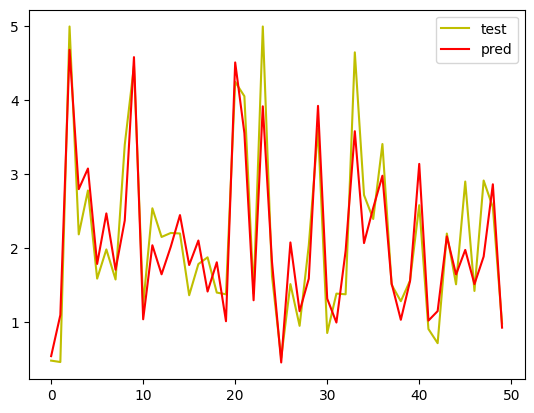

129/129 [==============================] - 0s 857us/step - loss: 0.2845 - root_mean_squared_error: 0.5334
[0.28447917103767395, 0.5333659052848816]


In [13]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model.evaluate(X_test,y_test))

# autre API fonctionnelle (avec 2 entrées : 1 pour la couche wide et une pour la couche deep)

In [20]:
# 1ère entrée (variables 0 à 4 du dataset)
X_train_wide = X_train[:,:5].copy()
X_train_deep = X_train[:,2:].copy()
X_test_wide = X_test[:,:5].copy()
X_test_deep = X_test[:,2:].copy()

print(X_train_wide.shape)
print(X_train_deep.shape)

(16512, 5)
(16512, 6)


In [16]:
layer_norm12 = keras.layers.Normalization(input_shape=X_train.shape[1:])
layer_norm22 = keras.layers.Normalization(input_shape=X_train.shape[1:])
layer_hidden12 = keras.layers.Dense(30,activation="relu")
layer_hidden22 = keras.layers.Dense(30,activation="relu")
layer_concat12 = keras.layers.Concatenate()
layer_output12 = keras.layers.Dense(1)
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:])
input_deep = keras.layers.Input(shape=X_train_deep.shape[1:])



In [18]:
norm12 = layer_norm12(input_wide)
norm22 = layer_norm22(input_deep)
hidden12 = layer_hidden12(norm22)
hidden22 = layer_hidden22(hidden12)
concat12 = layer_concat12([norm12,hidden22])
output12 = layer_output12(concat12)


In [19]:
model2 = keras.Model(inputs=[input_wide,input_deep],outputs=[output12])

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model2.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm12.adapt(X_train_wide)
layer_norm22.adapt(X_train_deep)
history2 = model2.fit((X_train_wide,X_train_deep),y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 1.9284 - root_mean_squared_error: 1.3887 - val_loss: 0.8084 - val_root_mean_squared_error: 0.8991
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.6790 - root_mean_squared_error: 0.8240 - val_loss: 0.5946 - val_root_mean_squared_error: 0.7711
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.5169 - root_mean_squared_error: 0.7189 - val_loss: 0.4948 - val_root_mean_squared_error: 0.7034
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4471 - root_mean_squared_error: 0.6686 - val_loss: 0.4454 - val_root_mean_squared_error: 0.6674
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4008 - root_mean_squared_error: 0.6331 - val_loss: 0.4126 - val_root_mean_squared_error: 0.6424
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3903 - root_mean_squared_error: 0.6248 - val_loss: 0.4080 - val_

129/129 [==============================] - 0s 1ms/step


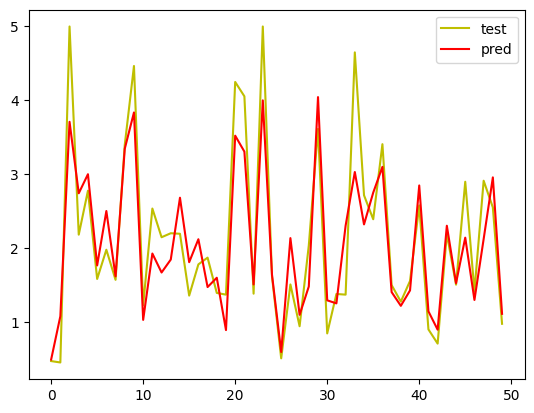

129/129 [==============================] - 0s 2ms/step - loss: 0.3216 - root_mean_squared_error: 0.5671
[0.32158175110816956, 0.5670818090438843]


In [24]:
import matplotlib.pyplot as plt

y_pred2 = model2.predict((X_test_wide,X_test_deep))
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred2[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model2.evaluate((X_test_wide,X_test_deep),y_test))